# 비어플 17기 신입세션 1주차


In [36]:
# 주석 처리 (ctrl + /) 
# 1+2

markdown : 단축키 등을 사용하여 코드상에서 메모를 달 때 사용

- Esc + 'y' : Code 셀로 변환
- Esc + 'm' : Markdown 셀로 변환
---
# 큰 제목
##  중간 제목
### 작은 제목 

1. 번호를 매길 때
2. 사용하기
3. 좋습니다.
ajdks
- 줄바꿈하는
- 메모를 칠 때
- 유용합니다.

마크다운

마크다운

---

## 0. 도메인 살펴보기 : 건강검진정보 데이터

1. 개요
- 건강검진정보 데이터는 국민건강보험에서 제공하는 건강검진 결과 및 수검 이력 데이터로, 매년 약 **100만 명**의 검진 데이터를 포함하며, 건강 상태와 관련된 통계 및 분석에 유용한 공공데이터
- 대상자 정보 : 성별, 연령대 시도코드 등 기본적인 인구통계학적 정보
- 검진 내역 : 신장, 체중, 총콜레스테롤, 혈색소, 혈압, 공복혈당 등 주요 건강 지표

2. 데이터 변수 설명
- '연령대코드(5세단위)' : 20세-85세 이상까지의 나이 정보가 담겨있음.(5=20-24세, 6=25-29세 , ...)
- '감마지티피' : 간의 상태를 나타내는 주요 지표로, 흡연과 연관지을 수 있음
- '수축기혈압','이완기혈압' : 심장이 수축/이완할 때의 혈압 (정상범위 - 수축기(120mmHg이하), 이완기(80mmHg) 이하)
- 'HDL콜레스테롤' : '좋은 콜레스테롤'로 불리며, 수치가 높을수록 심혈관 질환 위험이 낮아짐 (정상범위 - 40mg/dL)
- 'LDL콜레스테롤' : '나쁜 콜레스테롤'로 불리며, 수치가 높으면 동맥경화 위험이 증가함 (정상범위 - 100mg/dL)
- '간 기능 관련' : '혈정지오티(AST)', '혈청지피티(ALT)', '감마지피티' - 간의 사태를 나타내는 주요 지표, 흡연/음주와 연관?


## 1. 가설 세우기
- 연령대가 높아질수록 대사증후군 관련 지표(허리둘레, 공복혈당, 혈압 등)의 값이 높아질 것이다.
- 흡연자는 비흡연자보다 간 기능 수치(감마지티피, 혈청지오티 등)가 나쁠 것이다.
- 특정 지역(시도코드)에 따라 평균 체질량지수(BMI)가 다를 수 있다.

## 2. 라이브러리 로드 & 한글폰트 설정

pandas : 데이터 분석 라이브러리  
numpy : 다양한 계산과 분석 라이브러리  
matplotlib : 시각화 도구 제공  
seaborn : 더 정돈된 시각화 도구

In [2]:
# 데이터 분석 및 시각화 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 한글폰트 사용을 위해 설치
# 아래 코드 실행하면 한글 폰트 설치할 필요 없음!

!pip install koreanize-matplotlib

import koreanize_matplotlib

## 3. 데이터 불러오기

### 건강검진정보 데이터 소개
- 총 32개 변수
- 주요 항목 : 성별, 연령대, 신체지표(신장, 체중, 허리둘레), 건강지표(혈압, 혈당, 콜레스테롤) 등

In [4]:
# 현재 폴더의 위치를 확인
%pwd

'C:\\Users\\wltn4\\비어플_16기'

In [5]:
# 절대 경로를 이용한 데이터 불러오기
data = pd.read_csv('C:/Users/wltn4/비어플_16기/data/국민건강보험공단_건강검진정보_2023.csv',encoding='cp949')

In [6]:
# 상대 경로를 이용한 데이터 불러기기
data2 = pd.read_csv('data/국민건강보험공단_건강검진정보_2023.csv',encoding='cp949')

In [7]:
# equals() 메서드 : 두 데이터프레임이 정확하게 동일한 지 확인하는 방법
data.equals(data2)

True

In [8]:
data

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [10]:
# 열 확인
print(data.columns)

Index(['기준년도', '가입자일련번호', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5cm단위)',
       '체중(5kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '혈청지오티(AST)', '혈청지피티(ALT)', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치 유무', '치아마모증유무', '제3대구치(사랑니) 이상',
       '치석'],
      dtype='object')


In [11]:
# 데이터 크기
print(data.shape)

(1000000, 33)


## 4. EDA
### 목적  
- 데이터의 개형 살펴보기
- 간단한 인사이트 얻기
- 전처리를 위한 준비

### 4-1 데이터 살펴보기

**기준년도**: 검사 연도  
**가입자일련번호**: 고유 식별번호  
**시도코드**: 지역 코드  
**성별코드**: 성별 코드 (1: 남성, 2: 여성)  
**연령대코드(5세단위)**: 5세 단위로 구분된 연령대  
**신장, 체중**: 신체 측정값  
**허리둘레**: 복부 측정값  
**시력, 청력**: 좌우 시력과 청력 측정값  
**혈압**: 수축기 및 이완기 혈압  
**혈당, 콜레스테롤**: 건강 지표들
**흡연여부**: 1: 비흡연자, 2: 과거흡연자, 3: 흡연자

In [12]:
data.head() #앞에 5개 행 추출

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN


In [13]:
data.tail() #뒤에 5개 행 추출

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN
999999,2023,1279122,31,2,12,160,50,75.0,0.8,0.7,...,21.0,34.0,1.0,0.0,1,0.0,NaN,NaN,NaN,2.0


In [14]:
data.info() #결측치, 변수 타입, 데이터 차원 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 33 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   기준년도           1000000 non-null  int64  
 1   가입자일련번호        1000000 non-null  int64  
 2   시도코드           1000000 non-null  int64  
 3   성별코드           1000000 non-null  int64  
 4   연령대코드(5세단위)    1000000 non-null  int64  
 5   신장(5cm단위)      1000000 non-null  int64  
 6   체중(5kg단위)      1000000 non-null  int64  
 7   허리둘레           999589 non-null   float64
 8   시력(좌)          999816 non-null   float64
 9   시력(우)          999823 non-null   float64
 10  청력(좌)          999863 non-null   float64
 11  청력(우)          999862 non-null   float64
 12  수축기혈압          994253 non-null   float64
 13  이완기혈압          994253 non-null   float64
 14  식전혈당(공복혈당)     994186 non-null   float64
 15  총콜레스테롤         338606 non-null   float64
 16  트리글리세라이드       338606 non-null   float64
 17  HDL콜레스테롤 

In [15]:
data.describe() #기술통계량 확인

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
count,1000000.0,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,999589.000000,999816.000000,999823.000000,...,994184.000000,994187.000000,999911.000000,999944.000000,1000000.000000,346848.000000,0.0,0.0,0.0,346848.000000
mean,2023.0,2.499892e+06,33.826110,1.484965,10.598531,162.683560,64.334995,81.322400,0.956662,0.954260,...,26.363751,35.382367,1.543575,0.659812,0.346848,0.158894,NaN,NaN,NaN,0.564008
std,0.0,1.443348e+06,12.543398,0.499774,3.046639,9.348951,13.864438,10.858057,0.575118,0.570776,...,26.100922,62.437751,0.788110,0.473772,0.475967,0.365578,NaN,NaN,NaN,0.570572
min,2023.0,3.000000e+00,11.000000,1.000000,5.000000,130.000000,30.000000,7.500000,0.100000,0.100000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,2023.0,1.250397e+06,27.000000,1.000000,8.000000,155.000000,55.000000,74.000000,0.700000,0.700000,...,15.000000,15.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,2023.0,2.500716e+06,41.000000,1.000000,11.000000,165.000000,65.000000,81.000000,0.900000,1.000000,...,21.000000,22.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,1.000000
75%,2023.0,3.749801e+06,43.000000,2.000000,13.000000,170.000000,75.000000,88.000000,1.200000,1.200000,...,30.000000,37.000000,2.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,1.000000
max,2023.0,5.000000e+06,49.000000,2.000000,18.000000,195.000000,135.000000,999.000000,9.900000,9.900000,...,6297.000000,9999.000000,3.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,2.000000


### 4-2 결측치 및 중복 데이터 확인

In [16]:
data.isna().sum(axis=0).sort_values() #결측치 개수 오름차순 정렬
## 제3대구치(사랑니) 이상, 결손치 유무, 치아마모증유무 -> 모든 행이 결측치이므로 지워도 될듯?

기준년도                   0
가입자일련번호                0
시도코드                   0
성별코드                   0
연령대코드(5세단위)            0
신장(5cm단위)              0
체중(5kg단위)              0
구강검진수검여부               0
음주여부                  56
흡연상태                  89
청력(좌)                137
청력(우)                138
시력(우)                177
시력(좌)                184
허리둘레                 411
수축기혈압               5747
이완기혈압               5747
감마지티피               5813
식전혈당(공복혈당)          5814
혈청크레아티닌             5814
혈청지피티(ALT)          5816
혈청지오티(AST)          5816
혈색소                 5817
요단백                11156
치아우식증유무           653152
치석                653152
HDL콜레스테롤          661394
총콜레스테롤            661394
트리글리세라이드          661394
LDL콜레스테롤          667247
제3대구치(사랑니) 이상    1000000
결손치 유무           1000000
치아마모증유무          1000000
dtype: int64

<Axes: >

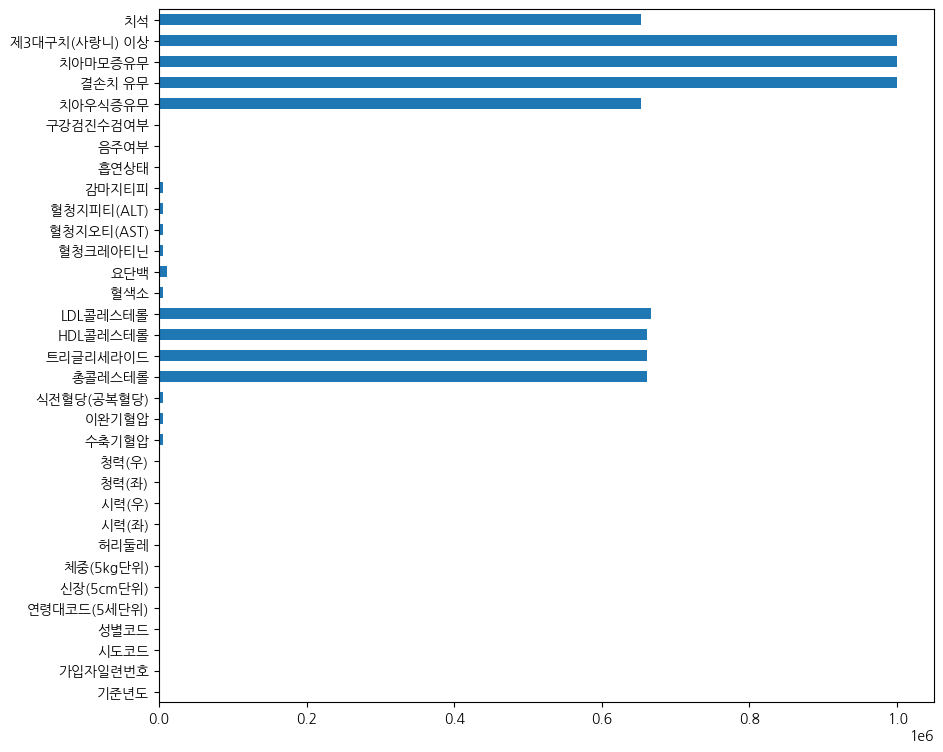

In [17]:
## 결측치 시각화 (only 가독성있게 결측치를 확인하기 위해서)
data.isnull().sum().plot.barh(figsize=(10, 9))

In [23]:
## 중복행 확인
data[data.duplicated()] # 중복행 없음!

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석


### 4-3. 변수별로 특징을 살펴보기
- 시각화 (각 변수의 상관관계 _ ex.연령대별 혈당 변화를 시각화한다.)
- 결측치 처리 (아예지우기(추천x), 평균치/최빈값 대체, 도메인 지식을 가지고 논리적으로 대체)
- **결측치 처리, 대체, eda, 전처리 시에는 원본 데이터를 남겨두고, 분석하는게 좋다**

---

1. 연령대/성별로 허리둘레 분포 시각화
2. 흡연과 간 기능 관련 수치 간의 관계 파악
3. 연령대별 공복혈당수치 확인
4. 음주와 이완기혈압의 관계
5. 신장과 체중 / 허리둘레와 체중간의 관계 파악

In [19]:
df = data.copy() # 원본 데이터 프레임 유지
df

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5cm단위),체중(5kg단위),허리둘레,시력(좌),시력(우),...,혈청지피티(ALT),감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,결손치 유무,치아마모증유무,제3대구치(사랑니) 이상,치석
0,2023,34735,46,2,9,155,70,92.0,1.2,1.2,...,24.0,50.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
1,2023,4105118,11,1,17,160,55,86.0,0.9,9.9,...,11.0,31.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
2,2023,362482,36,2,13,150,65,96.0,1.0,0.8,...,29.0,24.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
3,2023,653166,11,1,13,160,70,85.0,1.0,1.2,...,21.0,27.0,3.0,1.0,1,0.0,NaN,NaN,NaN,0.0
4,2023,4152237,41,1,12,165,65,84.5,1.0,1.2,...,33.0,49.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2023,3265034,26,1,8,170,65,78.0,1.2,1.0,...,13.0,22.0,1.0,1.0,1,0.0,NaN,NaN,NaN,1.0
999996,2023,1421865,41,1,10,165,80,96.1,0.9,1.2,...,65.0,160.0,2.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999997,2023,3889375,41,2,11,155,65,87.0,0.5,0.7,...,26.0,25.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN
999998,2023,2618086,41,2,7,160,55,69.0,1.0,1.2,...,20.0,16.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN


In [20]:
data['연령대코드(5세단위)'].value_counts()

연령대코드(5세단위)
11    127965
9     117307
13    113124
12     98632
10     93336
7      90527
14     73631
8      72393
6      70889
15     55414
5      33930
16     26779
17     20042
18      6031
Name: count, dtype: int64

**연령대 & 성별코드 & 허리둘레**
- 남성의 허리둘레가 여성의 허리둘레 보다 평균적으로 높은 수치일 것이다.
- 연령대가 높아질수록 허리둘레가 굵어질 것이다.

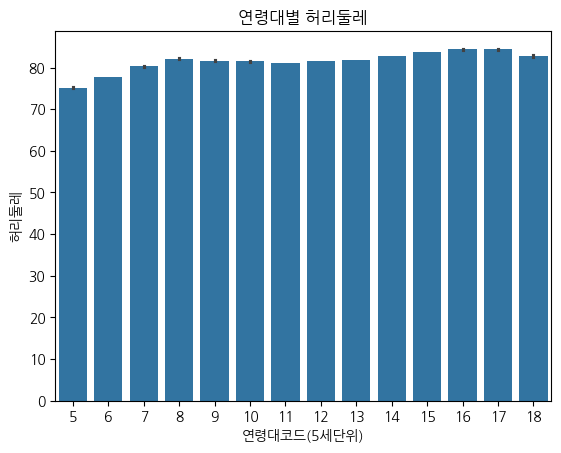

In [24]:
# 연령대별 허리둘레 _ 연령대별 허리둘레
sns.barplot(x="연령대코드(5세단위)", y="허리둘레", data=df) # 자동으로 평균 계산하여 그래프 그려줌
plt.title("연령대별 허리둘레")
plt.show()

#### hue 사용
- 데이터를 그룹별로 구분하여 시각화하는 방법
- 그룹별로 색상이 달라지고, 각 그룹의 데이터가 별도로 표시되므로 추가적인 분석이 가능


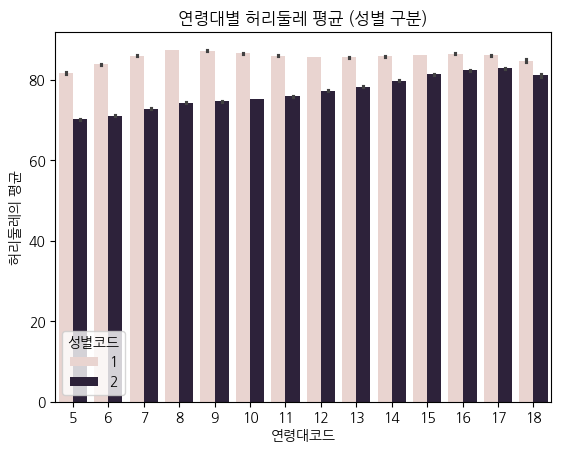

In [25]:
# 성별에 따른 연령대별 허리둘레 평균 비교
sns.barplot(x="연령대코드(5세단위)", y="허리둘레", hue="성별코드", data=df)
plt.title("연령대별 허리둘레 평균 (성별 구분)")
plt.xlabel("연령대코드")
plt.ylabel("허리둘레의 평균")
plt.show()

**간 수치 관련 변수**
- 혈정지오티(AST)', '혈청지피티(ALT)', '감마지피티'
- '흡연상태' -> 1 : 비흡연, 2 : 과거 흡연, 3 : 현재 흡연
- 흡연자가 비흡연자에 비해 감마지피티 수치가 높을 것이다?

<Axes: xlabel='흡연상태', ylabel='감마지티피'>

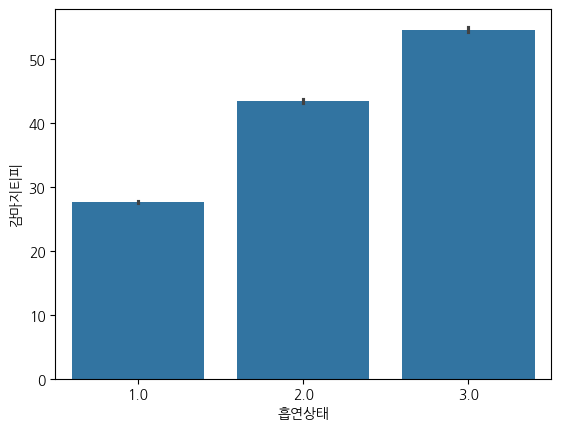

In [26]:
sns.barplot(x='흡연상태', y='감마지티피', data=df)

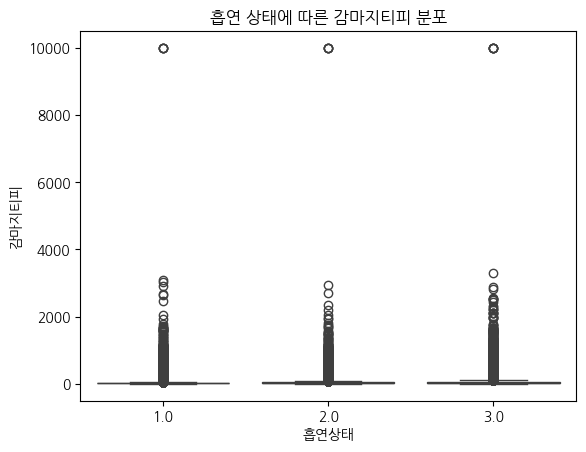

In [27]:
# 흡연 상태에 따른 감마지티피 분포
sns.boxplot(x="흡연상태", y="감마지티피", data=df)
plt.title("흡연 상태에 따른 감마지티피 분포")
plt.show()

- 감마지티피 변수에서 이상치가 있어보임.
- 이상치를 제거한 뒤 분포 살펴봐야함.

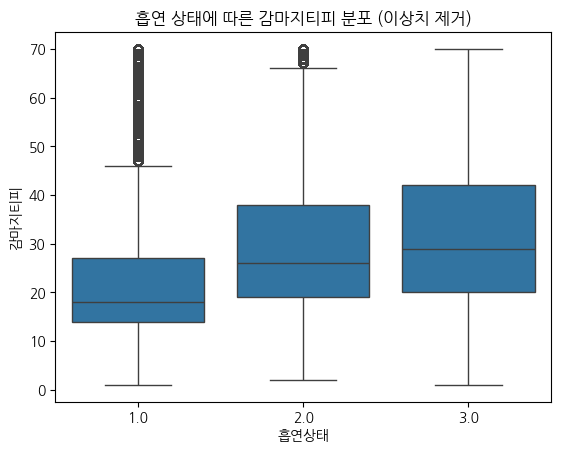

In [29]:
# 감마지티피 이상치 제거 (IQR방법 )
q1 = df["감마지티피"].quantile(0.25)
q3 = df["감마지티피"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df["감마지티피"] >= lower_bound) & (df["감마지티피"] <= upper_bound)]

# 이상치 제거 후 다시 그래프
sns.boxplot(x="흡연상태", y="감마지티피", data=df)
plt.title("흡연 상태에 따른 감마지티피 분포 (이상치 제거)")
plt.show()


**흡연상태와 감마지티피 사이의 관계있음**

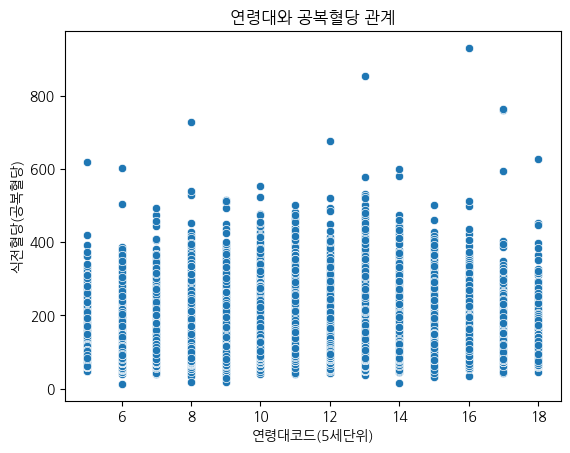

In [31]:
# 연령대와 공복혈당 관계 _산점도
sns.scatterplot(x="연령대코드(5세단위)", y="식전혈당(공복혈당)", data=df)
plt.title("연령대와 공복혈당 관계")
plt.show()

- 모든 값들의 분포를 다 볼 수 있는 산점도로 보니, 분석하기 어려움
- -> 연령대별 공복혈당의 "평균" 분포를 확인

In [32]:
## 연령대별 공복혈당의 평균 분포 확인
mean_fbs = df.groupby("연령대코드(5세단위)")["식전혈당(공복혈당)"].mean()
mean_fbs

연령대코드(5세단위)
5      90.312952
6      91.348200
7      92.979522
8      95.323431
9      96.704757
10     99.002862
11    100.845885
12    103.483145
13    104.612297
14    105.509953
15    106.634778
16    107.321071
17    107.626279
18    106.970594
Name: 식전혈당(공복혈당), dtype: float64

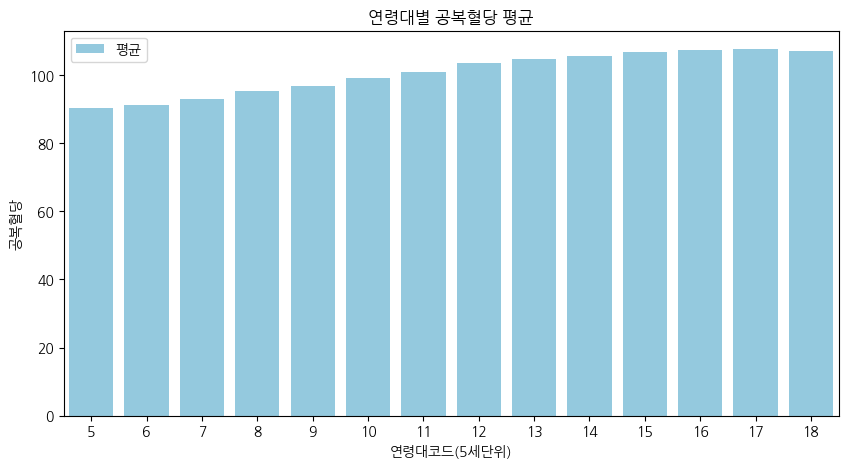

In [33]:
## 연령대별 공복혈당의 평균 분포 확인
mean_fbs = df.groupby("연령대코드(5세단위)")["식전혈당(공복혈당)"].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=mean_fbs.index, y=mean_fbs.values, color="skyblue", label="평균")
plt.title("연령대별 공복혈당 평균")
plt.xlabel("연령대코드(5세단위)")
plt.ylabel("공복혈당")
plt.legend()
plt.show()

- 뚜렷하진 않지만, 연령대가 높아질수록 공복혈당이 높아지는 것이 보임.

- 공복혈당 수치를 범주화해보기

C:\Users\wltn4\AppData\Local\Temp\ipykernel_9380\1426628815.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["공복혈당_범주"] = df["식전혈당(공복혈당)"].apply(categorize_fbs)


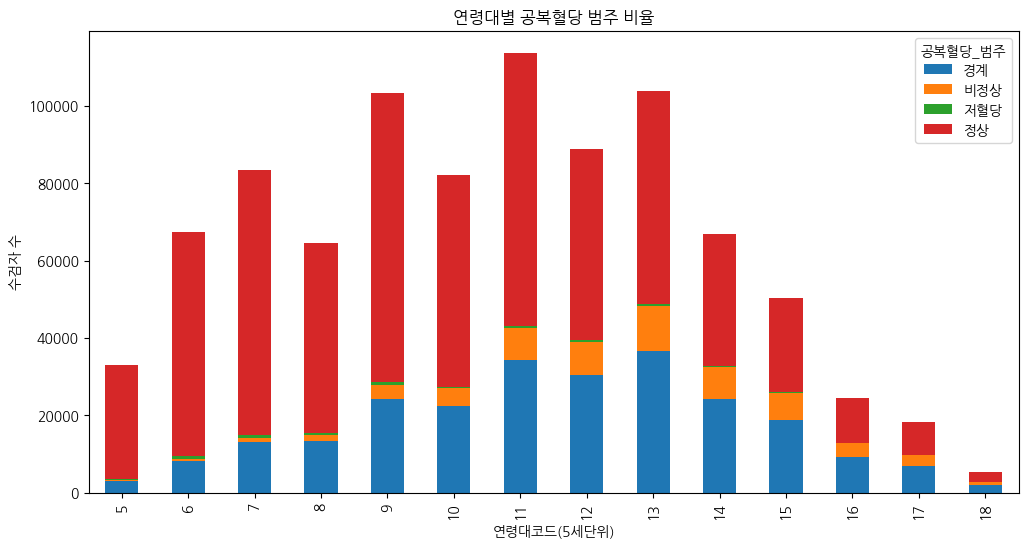

In [34]:
def categorize_fbs(value):
    if value < 70:
        return "저혈당"
    elif 70 <= value <= 100:
        return "정상"
    elif 100 < value <= 125:
        return "경계"
    else:
        return "비정상"

df["공복혈당_범주"] = df["식전혈당(공복혈당)"].apply(categorize_fbs)
category_counts = df.groupby(["연령대코드(5세단위)", "공복혈당_범주"])["공복혈당_범주"].count().unstack()
category_counts.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("연령대별 공복혈당 범주 비율")
plt.xlabel("연령대코드(5세단위)")
plt.ylabel("수검자 수")
plt.show()

- 50~60대에서 비정상적인 공복혈당이 다수 보임

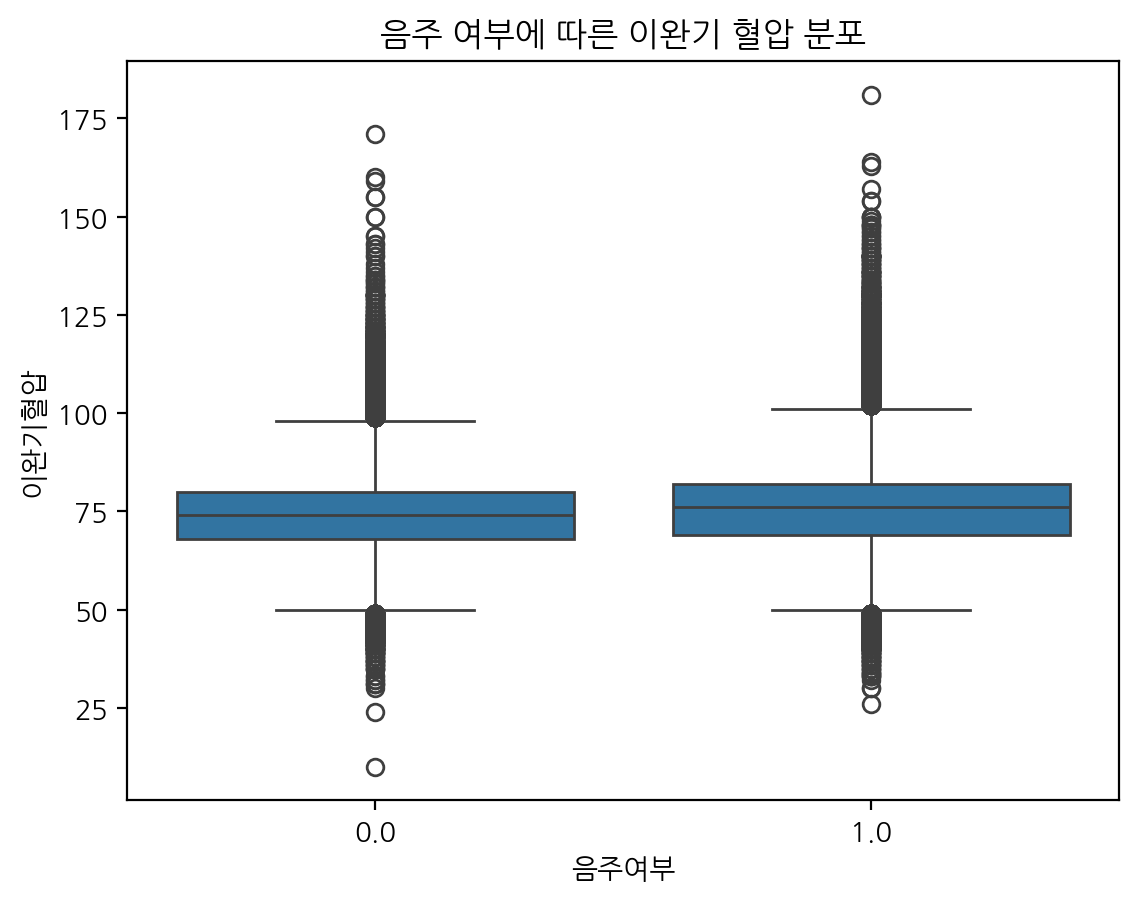

In [ ]:
sns.boxplot(x='음주여부', y='이완기혈압', data=data)
plt.title('음주 여부에 따른 이완기 혈압 분포')
plt.show()

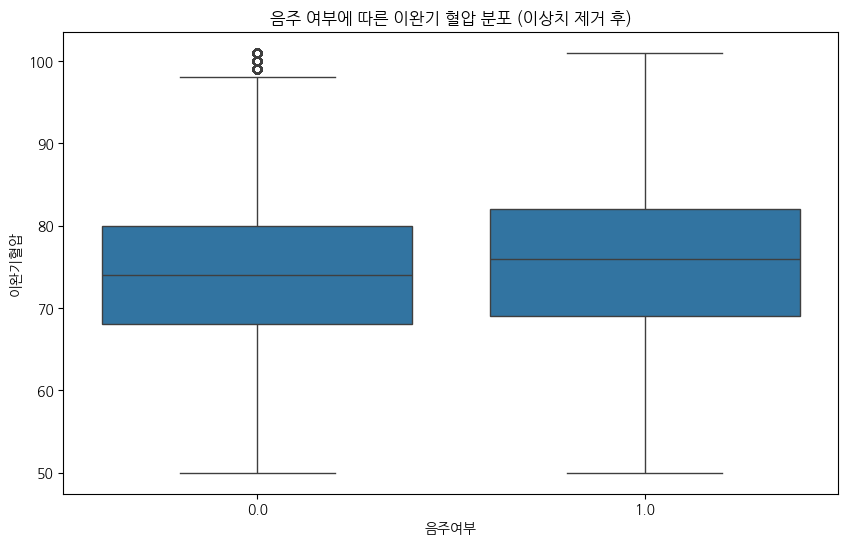

In [ ]:
# 이완기 혈압의 이상치를 제거하기 위한 IQR 계산
Q1 = data['이완기혈압'].quantile(0.25)  # 1사분위수
Q3 = data['이완기혈압'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1  # IQR (Interquartile Range)

# 이상치 조건: Q1 - 1.5 * IQR보다 작은 값 또는 Q3 + 1.5 * IQR보다 큰 값
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 제거
data_no_outliers = data[(data['이완기혈압'] >= lower_bound) & (data['이완기혈압'] <= upper_bound)]

# 이상치 제거 후, 음주 여부에 따른 이완기 혈압 분포 시각화
plt.figure(figsize=(10,6))
sns.boxplot(x='음주여부', y='이완기혈압', data=data_no_outliers)
plt.title('음주 여부에 따른 이완기 혈압 분포 (이상치 제거 후)')
plt.show()


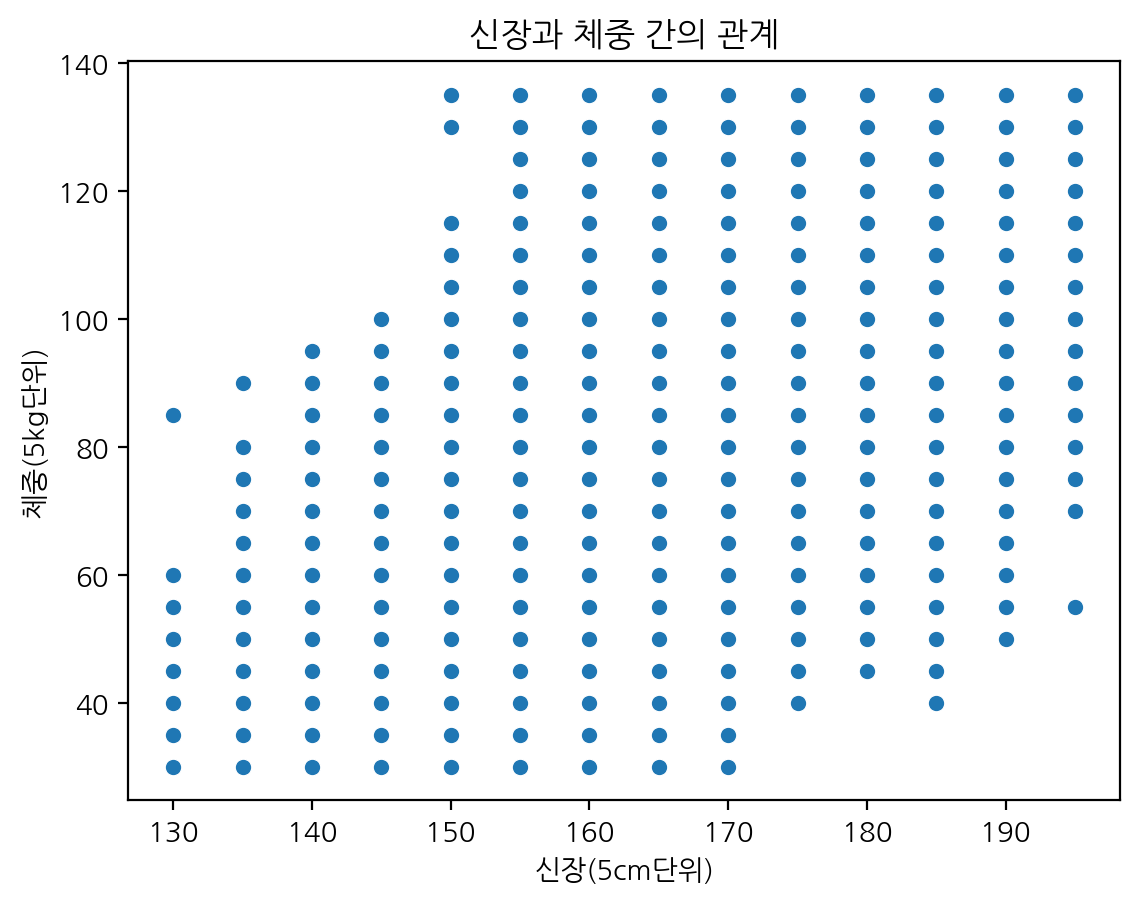

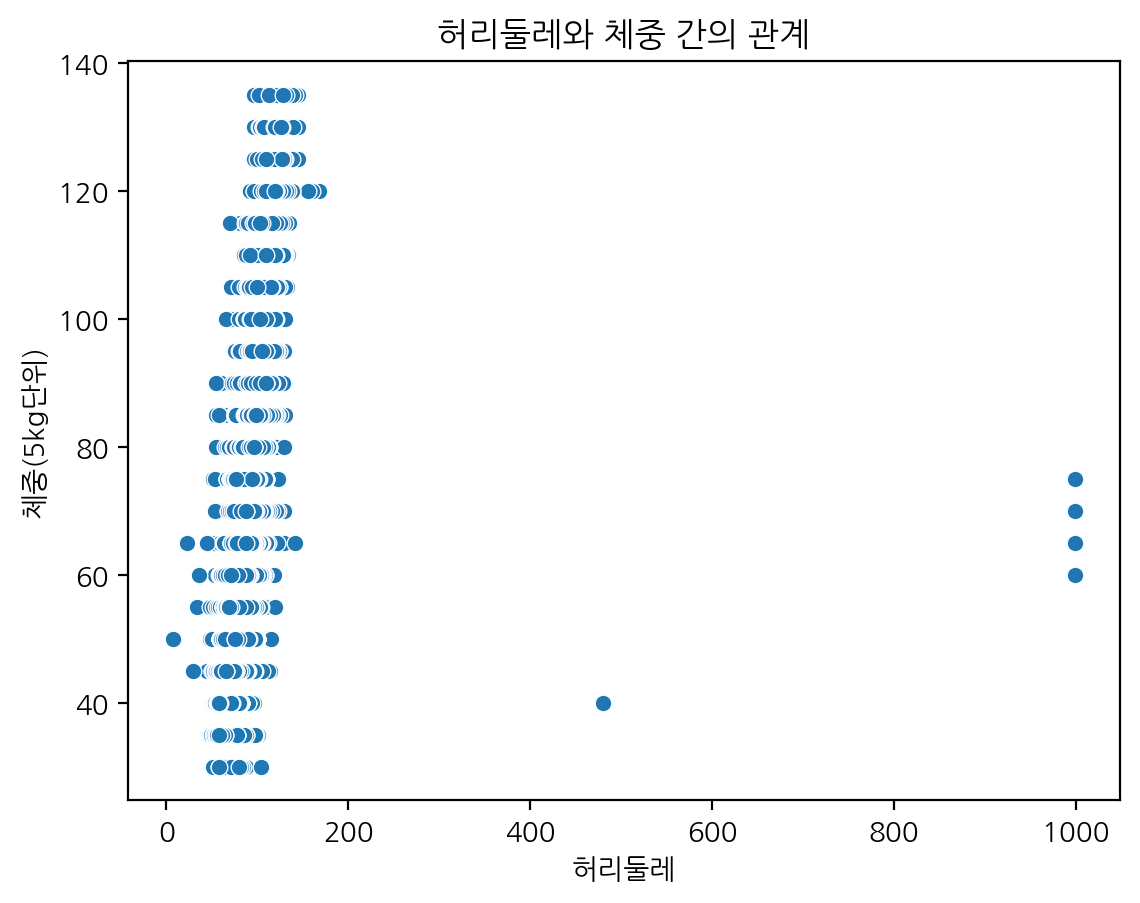

In [ ]:
# 신장과 체중 간의 관계 확인
sns.scatterplot(x='신장(5cm단위)', y='체중(5kg단위)', data=data)
plt.title('신장과 체중 간의 관계')
plt.show()

# 허리둘레와 체중 간의 관계 확인
sns.scatterplot(x='허리둘레', y='체중(5kg단위)', data=data)
plt.title('허리둘레와 체중 간의 관계')
plt.show()

- 일반적으로 남성의 허리둘레는 80-100cm, 여성은 70-90cm 정도이므로, 400이 넘는 값은 이상치라고 판단하고 제거 후 분포 살펴보기

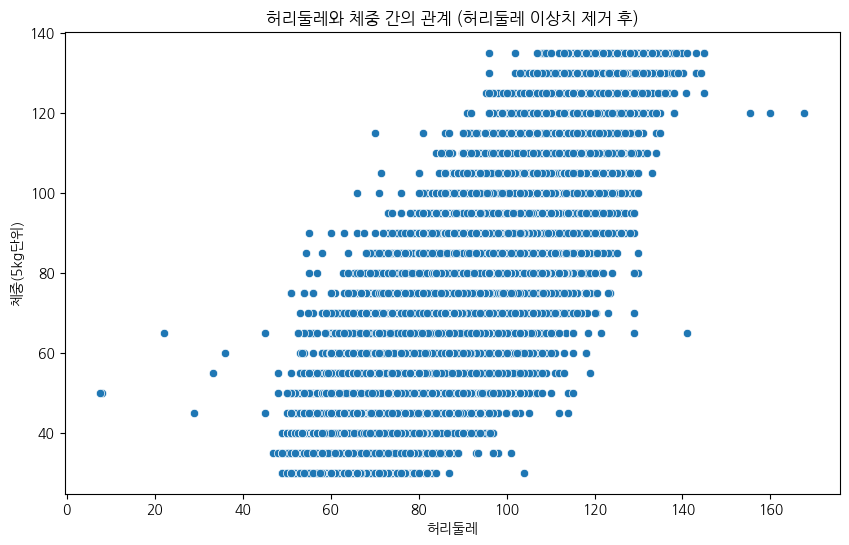

In [ ]:
# 허리둘레가 400을 초과하는 값을 이상치로 판단하고 제거
data_no_outliers_waist = data[data['허리둘레'] <= 400]

# 허리둘레와 체중 간의 관계 시각화 (허리둘레 이상치 제거 후)
plt.figure(figsize=(10,6))
sns.scatterplot(x='허리둘레', y='체중(5kg단위)', data=data_no_outliers_waist)
plt.title('허리둘레와 체중 간의 관계 (허리둘레 이상치 제거 후)')
plt.show()


- 더 확연하게 허리둘레와 체중 간의 관계를 살펴볼 수 있음

## 5. 파생변수 (변수변환)

1. 체질량 지수(BMI) 변수 생성해보기
- 체질량지수(BMI)는 신장과 체중을 사용하여 개인의 비만 정도를 평가하는 지표로, 신장을 미터 단위로 변환한 뒤 체중과 함께 BMI를 계산할 수 있음.

In [ ]:
data['신장(5cm단위)'].value_counts()

,count
신장(5cm단위),
160,187063
165,179544
170,166395
155,164667
175,106281
150,99569
180,41249
145,35274
185,8916


In [ ]:
data['체중(5kg단위)'].value_counts()

,count
체중(5kg단위),
55,141376
60,140483
65,132972
50,122534
70,119548
75,92930
45,65023
80,64041
85,40754


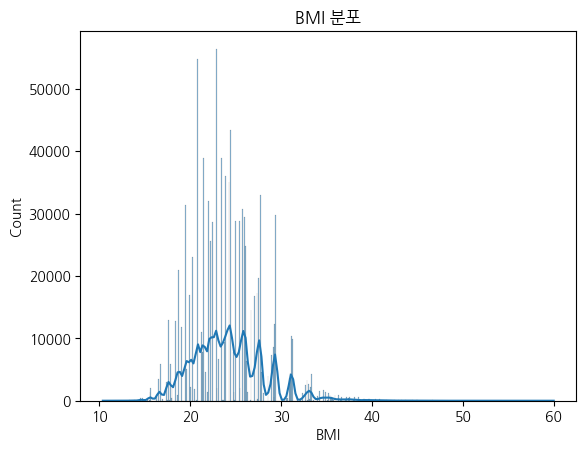

In [ ]:
# 신장을 미터 단위로 변환하여 BMI 계산
data['BMI'] = (data['체중(5kg단위)']) / ((data['신장(5cm단위)'] / 100) ** 2)

# BMI 분포 확인
sns.histplot(data['BMI'], kde=True)
plt.title('BMI 분포')
plt.show()

2. BMI 카테고리화 (범주형 변수로 변환)
- 저체중 : BMI < 18.5
- 정상체중 : 18.5 <= BMI < 25
- 과체중 : 25 <= BMI < 30
- 비만 : 30 <= BMI

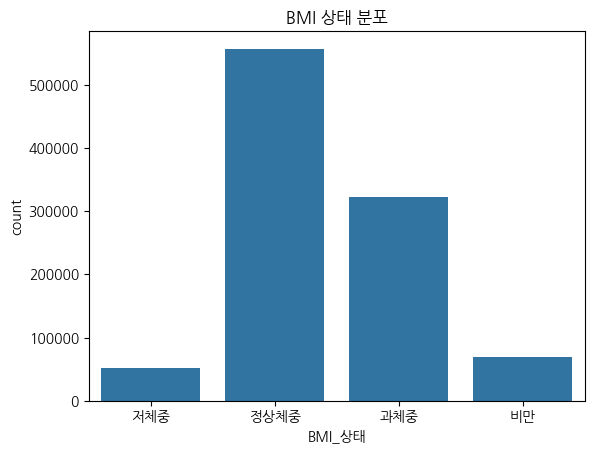

In [ ]:
# BMI를 기준으로 범주화
data['BMI_상태'] = pd.cut(data['BMI'], bins=[0, 18.5, 24.9, 29.9, 100], labels=['저체중', '정상체중', '과체중', '비만'])

# BMI 상태별 분포 확인
sns.countplot(x='BMI_상태', data=data)
plt.title('BMI 상태 분포')
plt.show()

## 추가 아이디어
1. 콜레스테롤 지표 생성
- '총콜레스테롤', 'HDL콜레스테롤', 'LDL콜레스테롤' 등 콜레스테롤 관련 지표 사용하여 콜레스테롤 비율이나 이상 여부 판단 변수 생성
2. 건강지표 간의 상관관계 분석
- '수축기혈압', '이완기혈압', '콜레스테롤' 등 건강 지표 간의 상관관계 파악
3. 음주/흡연 상태를 통합한 건강 리스크 지표 생성